# Proyecto DataIcfes

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kprototypes import KPrototypes

In [51]:
data = pd.read_csv('./data/data.csv', delimiter='|')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10000 non-null  int64  
 1   ESTU_CONSECUTIVO               10000 non-null  int64  
 2   ESTU_FECHAPRESENTACION         10000 non-null  object 
 3   ESTU_GRADO                     10000 non-null  int64  
 4   ESTU_GENERO                    10000 non-null  object 
 5   COLE_COD_DANE_ESTABLECIMIENTO  10000 non-null  int64  
 6   COLE_COD_DANE_SEDE             10000 non-null  int64  
 7   COLE_NOM_ESTABLECIMIENTO       10000 non-null  object 
 8   COLE_NOM_SEDE                  10000 non-null  object 
 9   COLE_COD_ICFES                 10000 non-null  int64  
 10  COLE_NATURALEZA                10000 non-null  object 
 11  COLE_CALENDARIO                10000 non-null  object 
 12  COLE_JORNADA                   10000 non-null  

In [52]:
data.describe()

,Unnamed: 0,ESTU_CONSECUTIVO,ESTU_GRADO,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_ICFES,COLE_COD_MCPIO,COLE_COD_DPTO,EXA_CUADERNILLO,EXA_N_PREGUNTAS,EXA_N_PREGUNTAS_OM,EXA_PRC_PREGUNTAS_OM,EXA_N_RTAS_CORR,EXA_N_RTAS_NOCORR,EXA_PRC_RTAS_CORR,EXA_PRC_RTAS_NOCORR
count,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.0,10000.0,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.855675e+06,1.658832e+07,7.648100,2.113785e+11,2.109955e+11,24929.353600,11001.0,11.0,1.0,3.607700,0.027600,0.784524,1.907500,1.672600,51.012158,48.203311
std,1.074466e+06,8.749849e+06,2.308549,1.005273e+11,1.007199e+11,16111.959653,0.0,0.0,0.0,3.972679,0.241752,7.289105,2.720199,2.098106,36.938151,36.894040
min,5.870000e+02,3.596000e+04,3.000000,1.110010e+11,1.110010e+11,717.000000,11001.0,11.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.279512e+05,5.845909e+06,6.000000,1.110011e+11,1.110011e+11,7902.000000,11001.0,11.0,1.0,2.000000,0.000000,0.000000,1.000000,0.000000,20.000000,0.000000
50%,1.853826e+06,2.211896e+07,8.000000,2.111020e+11,2.111020e+11,27006.000000,11001.0,11.0,1.0,3.000000,0.000000,0.000000,1.000000,1.000000,50.000000,50.000000
75%,2.802478e+06,2.311895e+07,10.000000,3.110011e+11,3.110011e+11,39678.000000,11001.0,11.0,1.0,4.000000,0.000000,0.000000,2.000000,2.000000,95.000000,75.000000
max,3.702821e+06,2.393192e+07,11.000000,4.118480e+11,4.118480e+11,64908.000000,11001.0,11.0,1.0,40.000000,8.000000,100.000000,33.000000,20.000000,100.000000,100.000000


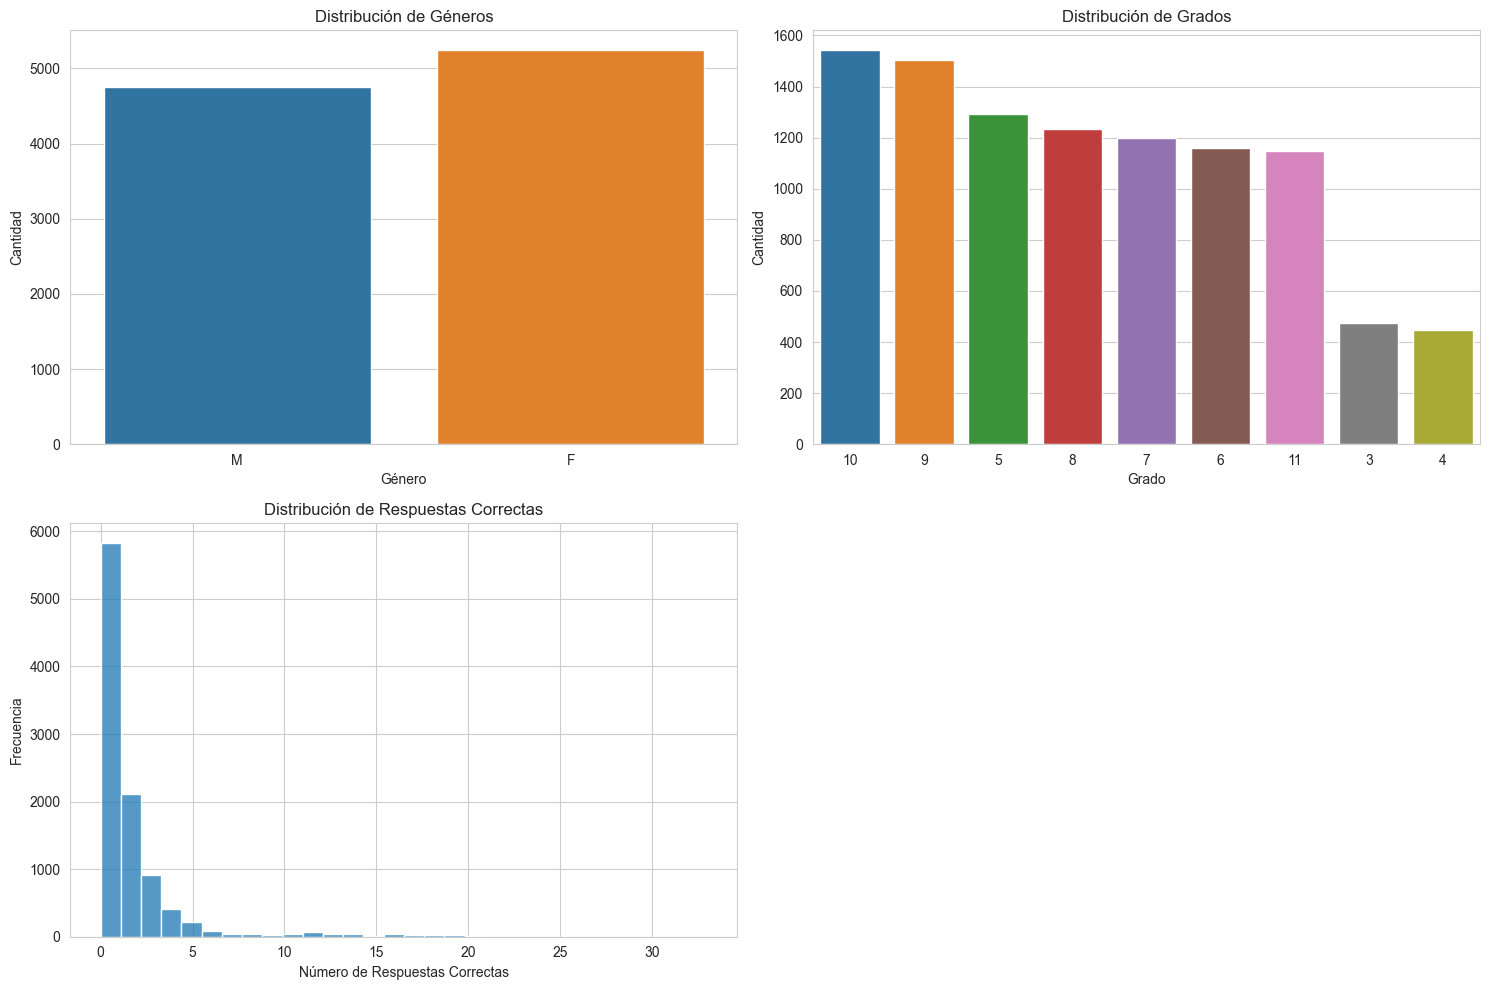

In [53]:
# Set the style of the visualization
sns.set_style("whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot distribution of genders
sns.countplot(data=data, x='ESTU_GENERO', ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Géneros')
axes[0, 0].set_xlabel('Género')
axes[0, 0].set_ylabel('Cantidad')

# Plot distribution of grades
sns.countplot(data=data, x='ESTU_GRADO', order=data['ESTU_GRADO'].value_counts().index, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Grados')
axes[0, 1].set_xlabel('Grado')
axes[0, 1].set_ylabel('Cantidad')

# Plot distribution of correct answers
sns.histplot(data=data, x='EXA_N_RTAS_CORR', bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Respuestas Correctas')
axes[1, 0].set_xlabel('Número de Respuestas Correctas')
axes[1, 0].set_ylabel('Frecuencia')

axes[1, 1].axis('off')

# Adjust the layout
plt.tight_layout()
plt.show()


**Distribución de Géneros:** La primera gráfica muestra la distribución de géneros en el dataset. Parece que hay una cantidad similar de estudiantes de ambos géneros, siendo ligeramente mayor el número de estudiantes masculinos.

**Distribución de Grados:** La segunda gráfica muestra la distribución de estudiantes por grado. Se ha ordenado la gráfica según la frecuencia de cada grado. Los grados con mayor número de estudiantes son el 4º, 6º y 9º, mientras que otros grados tienen una representación menor en el dataset.

**Distribución de Respuestas Correctas:** La tercera gráfica muestra la distribución del número de respuestas correctas. La mayoría de los estudiantes tiene un número de respuestas correctas entre 0 y 5, con picos notables alrededor de esos valores. La distribución es algo sesgada hacia la derecha, lo que indica que hay menos estudiantes con un número alto de respuestas correctas.

### Exploración de EXA_PRC_RTAS_CORR

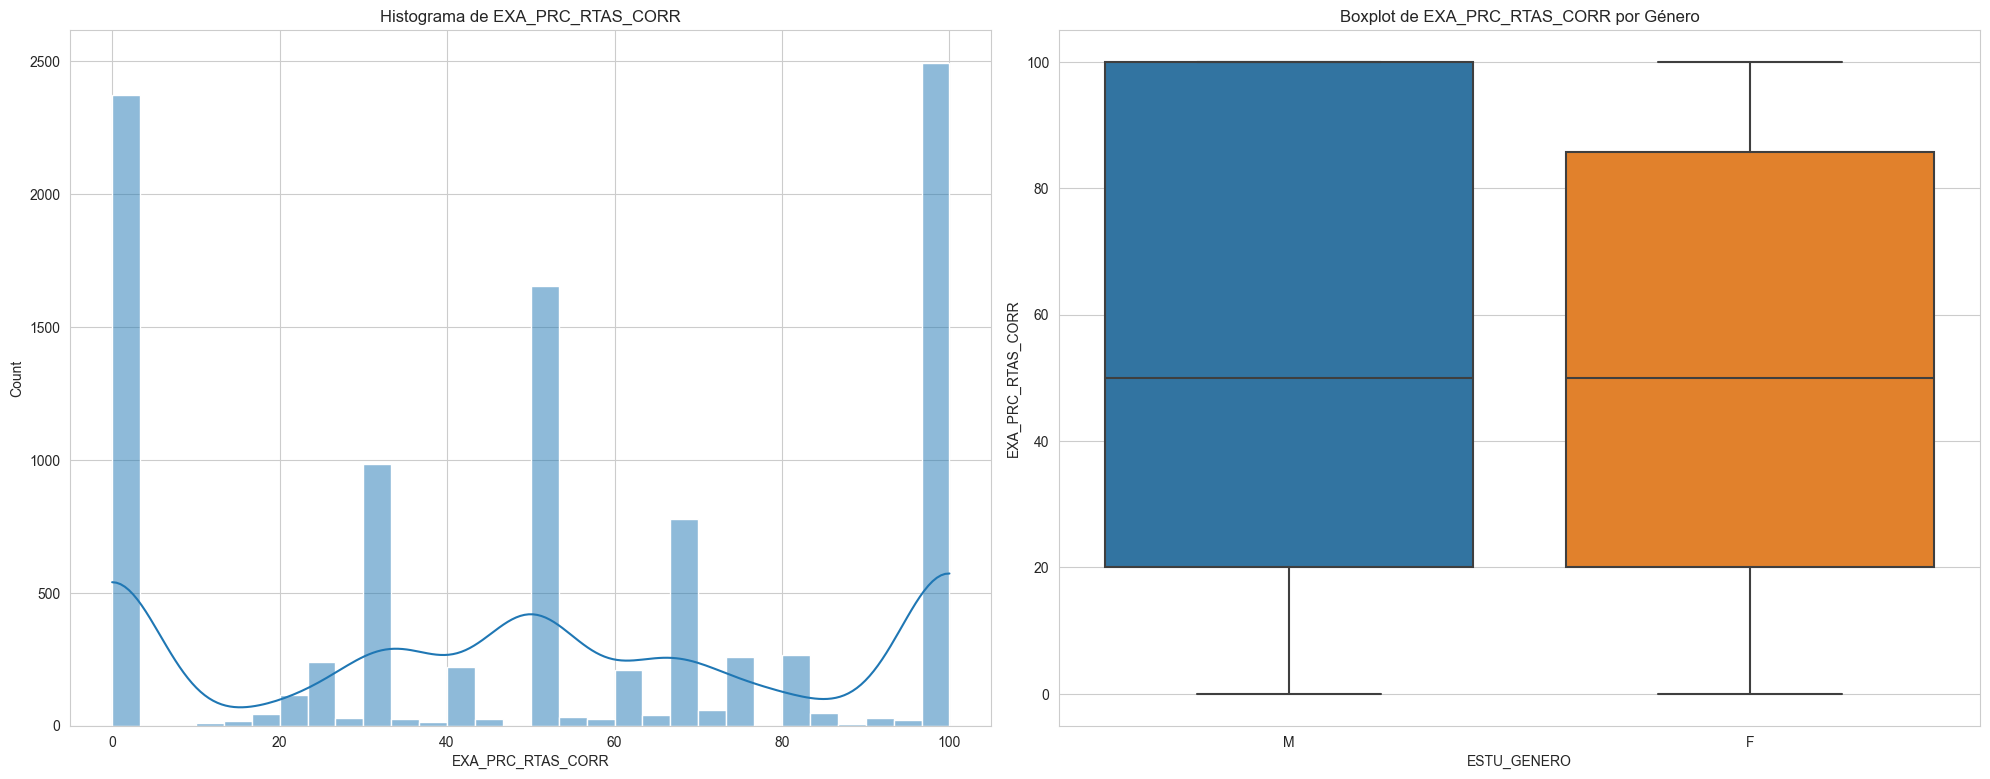

In [54]:
# Configuración de los gráficos
plt.figure(figsize=(20, 15))
sns.set_style("whitegrid")

# 1. Histograma de EXA_PRC_RTAS_CORR
plt.subplot(2, 2, 1)
sns.histplot(data['EXA_PRC_RTAS_CORR'], bins=30, kde=True)
plt.title("Histograma de EXA_PRC_RTAS_CORR")

# 2. Boxplot por Género
plt.subplot(2, 2, 2)
sns.boxplot(x=data['ESTU_GENERO'], y=data['EXA_PRC_RTAS_CORR'])
plt.title("Boxplot de EXA_PRC_RTAS_CORR por Género")

plt.tight_layout()
plt.show()


**Histograma de EXA_PRC_RTAS_CORR**: Esta gráfica muestra la distribución del porcentaje de respuestas correctas. Se observa que la mayoría de los estudiantes tienen un alto porcentaje de respuestas correctas, con picos notables alrededor del 0%, 50% y 100%.

**Boxplot por Género**: La distribución del porcentaje de respuestas correctas parece ser similar entre géneros, aunque puede haber algunas diferencias sutiles.

**Violin plot por EXA_INSTRUMENTO**: El violin plot combina un boxplot con un kernel density plot. Esta gráfica muestra la distribución del porcentaje de respuestas correctas para los cinco instrumentos más comunes en el dataset. Las diferencias en la forma de los "violines" sugieren que algunos instrumentos pueden tener distribuciones ligeramente diferentes en términos de porcentaje de respuestas correctas.

### Análisis por instrumento

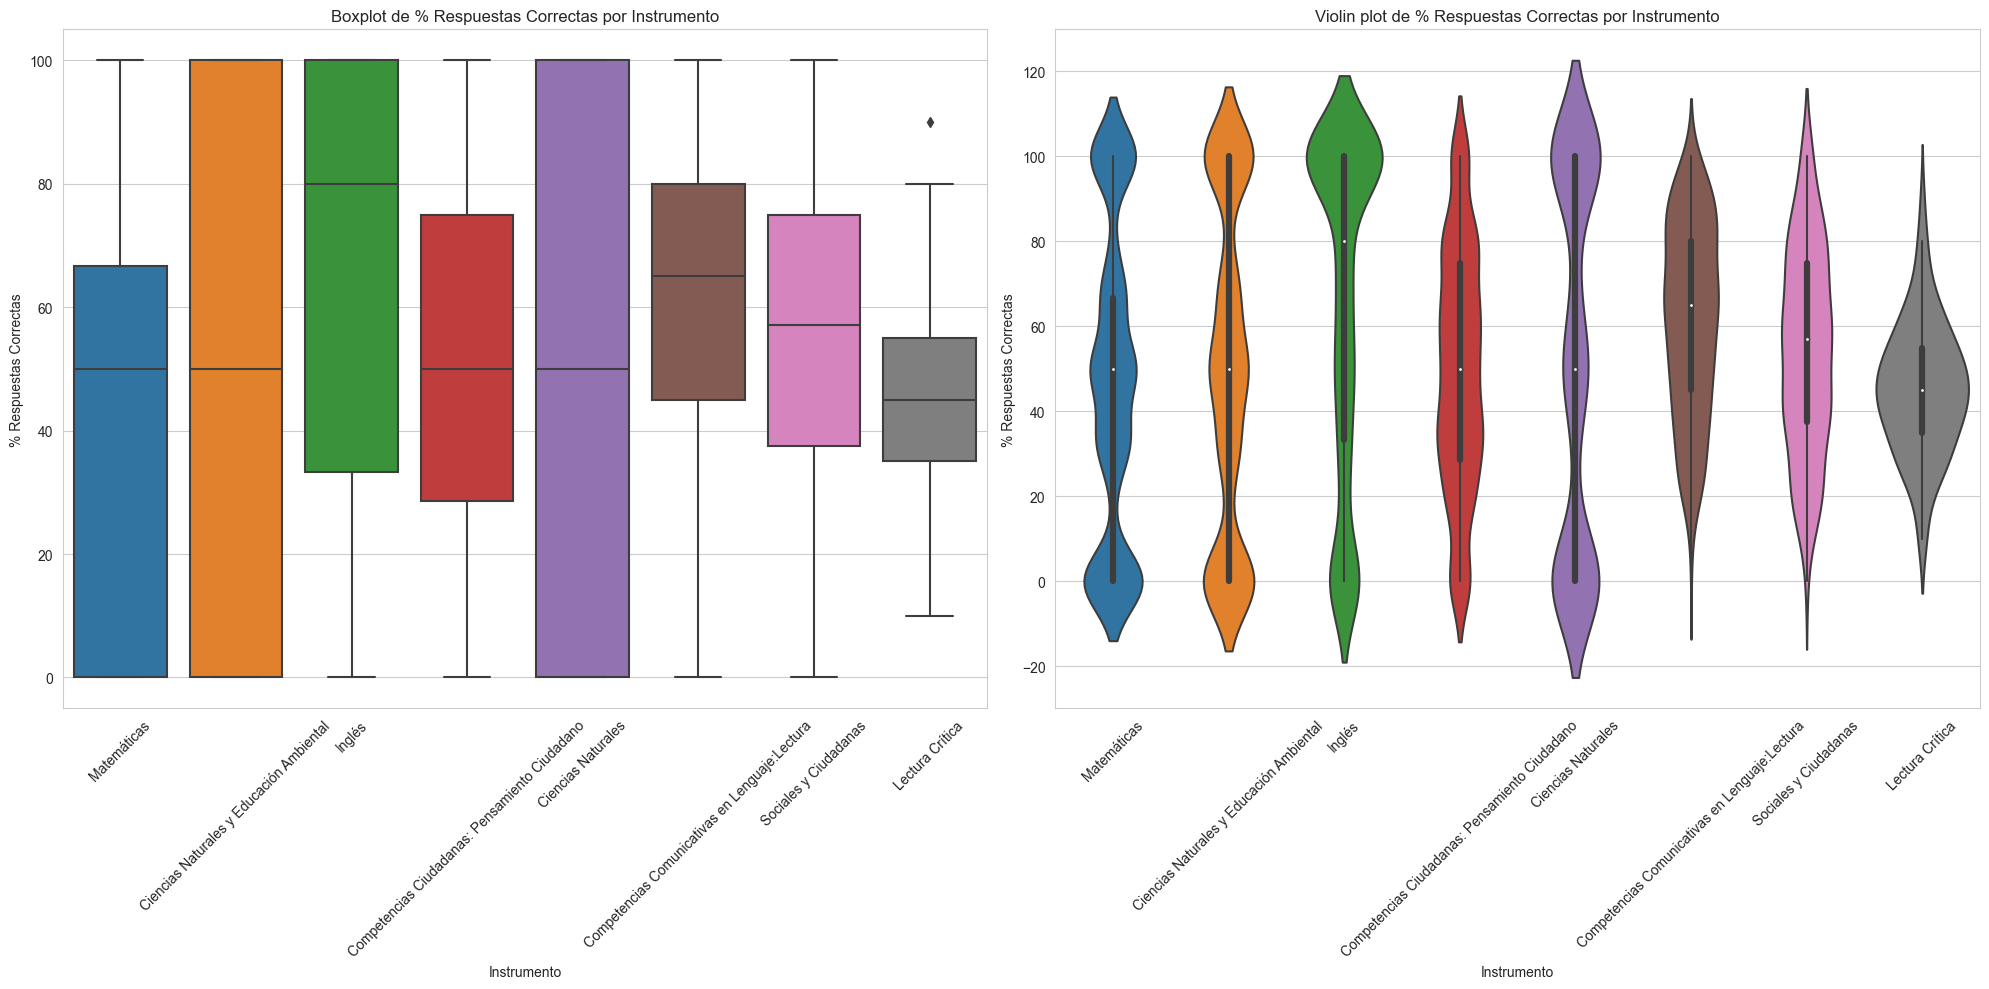

In [55]:
# Filtrar los datos para considerar solo los 10 instrumentos más comunes
top_instruments = data['EXA_INSTRUMENTO'].value_counts().head(10).index
filtered_data_instr = data[data['EXA_INSTRUMENTO'].isin(top_instruments)]

# Crear visualizaciones
plt.figure(figsize=(20, 10))

# Boxplots
plt.subplot(1, 2, 1)
sns.boxplot(x=filtered_data_instr['EXA_INSTRUMENTO'], y=filtered_data_instr['EXA_PRC_RTAS_CORR'], order=top_instruments)
plt.xticks(rotation=45)
plt.title("Boxplot de % Respuestas Correctas por Instrumento")
plt.ylabel("% Respuestas Correctas")
plt.xlabel("Instrumento")

# Violin plots
plt.subplot(1, 2, 2)
sns.violinplot(x=filtered_data_instr['EXA_INSTRUMENTO'], y=filtered_data_instr['EXA_PRC_RTAS_CORR'], order=top_instruments)
plt.xticks(rotation=45)
plt.title("Violin plot de % Respuestas Correctas por Instrumento")
plt.ylabel("% Respuestas Correctas")
plt.xlabel("Instrumento")

plt.tight_layout()
plt.show()


**Boxplot:** Cada caja representa la distribución intercuartil del porcentaje de respuestas correctas para un instrumento específico. Los bigotes se extienden hasta 1.5 veces el rango intercuartilico, y los puntos fuera de estos límites pueden considerarse valores atípicos.
Es evidente que algunos instrumentos, como "Competencias Ciudadanas: Convivencia" y "Competencias Ciudadanas: Pensamiento Ciudadano", tienen una mediana más alta en términos de porcentaje de respuestas correctas en comparación con otros instrumentos.

**Violin plot:** Los violin plots combinan un boxplot con una estimación de la densidad de kernel, lo que proporciona una visualización más rica de la distribución de los datos.
A partir de estas gráficas, se puede observar que instrumentos como "Matemáticas" y "Ciencias Naturales y Educación Ambiental" presentan una distribución bimodal, es decir, tienen dos picos en su distribución.

### Gráficas de Distribución por Componente

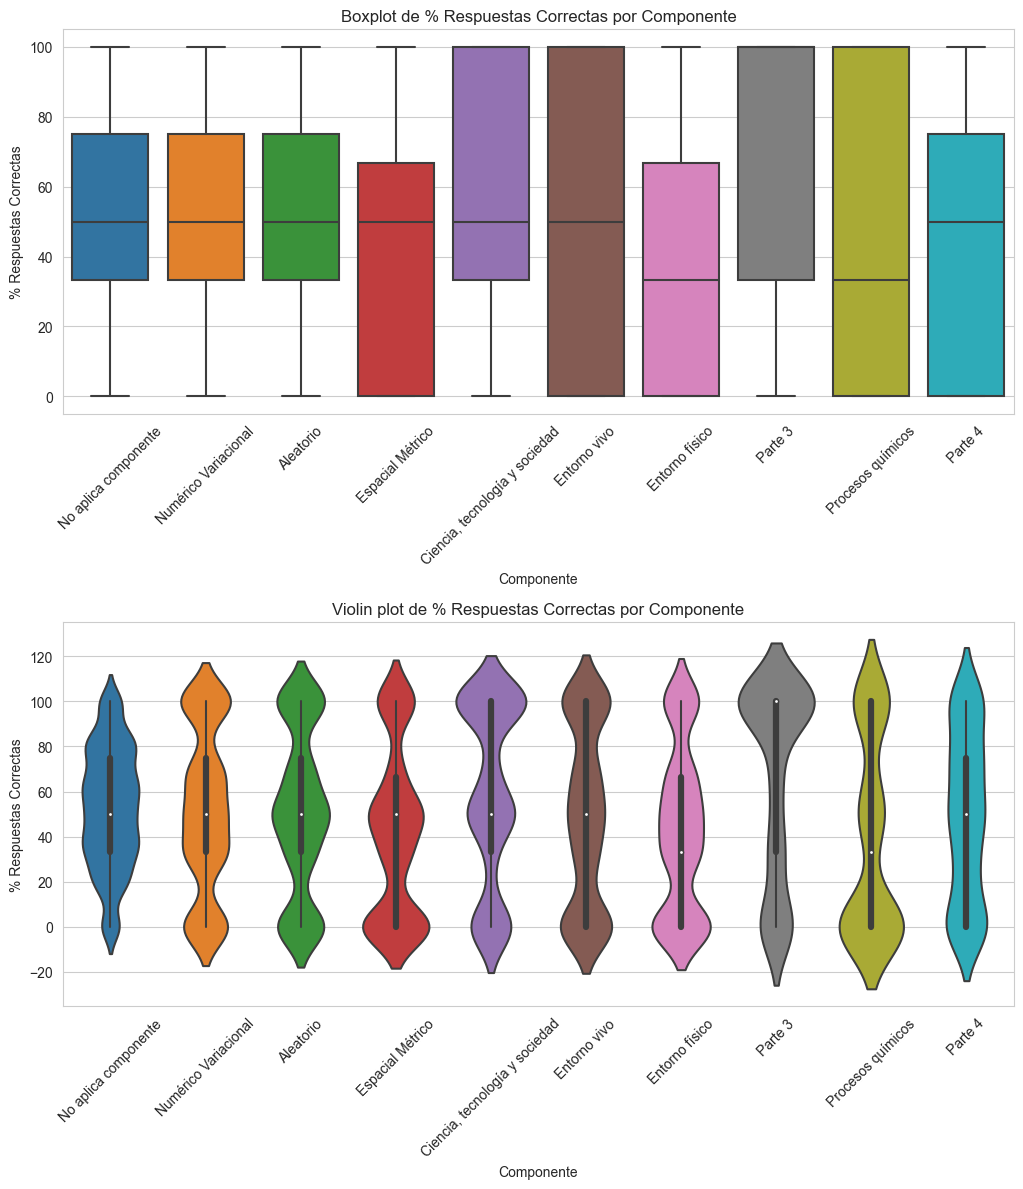

In [56]:
# Filtrar los datos para considerar solo los componentes más comunes (por ejemplo, los 10 componentes con más registros)
top_components = data['EXA_COMPONENTE'].value_counts().head(10).index
filtered_data_comp = data[data['EXA_COMPONENTE'].isin(top_components)]

# Crear visualizaciones
plt.figure(figsize=(20, 12))

# Boxplots - Respuestas Correctas
plt.subplot(2, 2, 1)
sns.boxplot(x=filtered_data_comp['EXA_COMPONENTE'], y=filtered_data_comp['EXA_PRC_RTAS_CORR'], order=top_components)
plt.xticks(rotation=45)
plt.title("Boxplot de % Respuestas Correctas por Componente")
plt.ylabel("% Respuestas Correctas")
plt.xlabel("Componente")

# Violin plots - Respuestas Correctas
plt.subplot(2, 2, 3)
sns.violinplot(x=filtered_data_comp['EXA_COMPONENTE'], y=filtered_data_comp['EXA_PRC_RTAS_CORR'], order=top_components)
plt.xticks(rotation=45)
plt.title("Violin plot de % Respuestas Correctas por Componente")
plt.ylabel("% Respuestas Correctas")
plt.xlabel("Componente")
plt.tight_layout()
plt.show()


## Análisis de KMedias

In [58]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from prince import MCA
import numpy as np

In [71]:


# Seleccionar columnas relevantes
selected_columns = ['EXA_PRC_RTAS_CORR', 'ESTU_GENERO', 'EXA_INSTRUMENTO', 'EXA_COMPONENTE']
cluster_data = data[selected_columns].copy()

# Codificar las características categóricas
categorical_cols = ['ESTU_GENERO', 'EXA_INSTRUMENTO', 'EXA_COMPONENTE']
for col in categorical_cols:
    cluster_data[col] = cluster_data[col].astype('category').cat.codes

# Estandarizar las características numéricas
cluster_data['EXA_PRC_RTAS_CORR'] = (cluster_data['EXA_PRC_RTAS_CORR'] - cluster_data['EXA_PRC_RTAS_CORR'].mean()) / cluster_data['EXA_PRC_RTAS_CORR'].std()

# Separar datos numéricos y categóricos
numeric_data = cluster_data[['EXA_PRC_RTAS_CORR']]
categorical_data = cluster_data[categorical_cols]



In [72]:

# Aplicar PCA a las características numéricas
pca = PCA(n_components=1)
numeric_transformed = pca.fit_transform(numeric_data)

# Aplicar MCA a las características categóricas
mca = MCA(n_components=2)
categorical_transformed = mca.fit_transform(categorical_data)

In [73]:
# Combinar las características transformadas
combined_transformed = np.hstack((numeric_transformed, categorical_transformed))

In [80]:
# Determinar el número óptimo de clusters usando el método del codo para K-means
inertia = []
for num_clusters in range(1, 15):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(combined_transformed)
    inertia.append(kmeans.inertia_)

c:\Users\facio\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\facio\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\facio\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\facio\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\facio\anaconda3

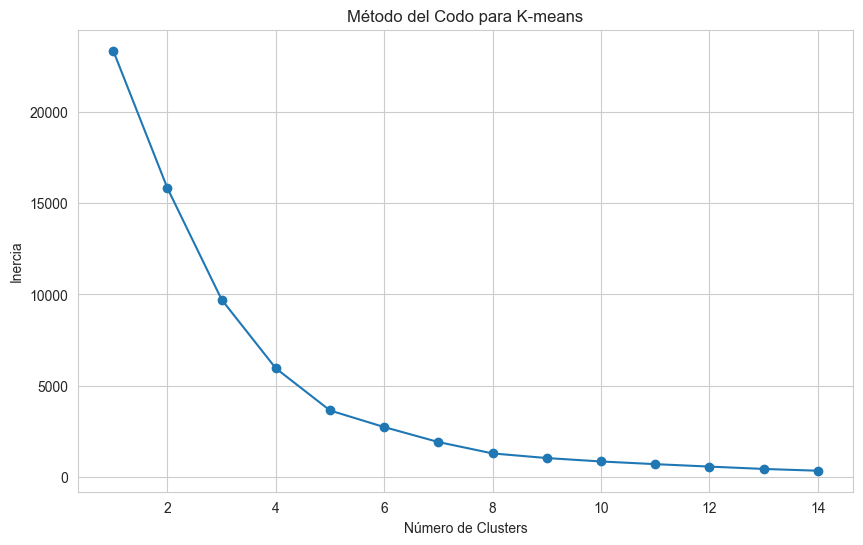

In [81]:

# Graficar la inercia vs número de clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-means')
plt.show()

Esto sugiere que elegir 5 clusters 

In [83]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(combined_transformed)

c:\Users\facio\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

### Gráficos de dispersión

In [78]:
kmeans.labels_.shape

(10000,)

In [ ]:
categorical_cols

In [102]:
labels

array([2, 1, 4, ..., 1, 1, 0])

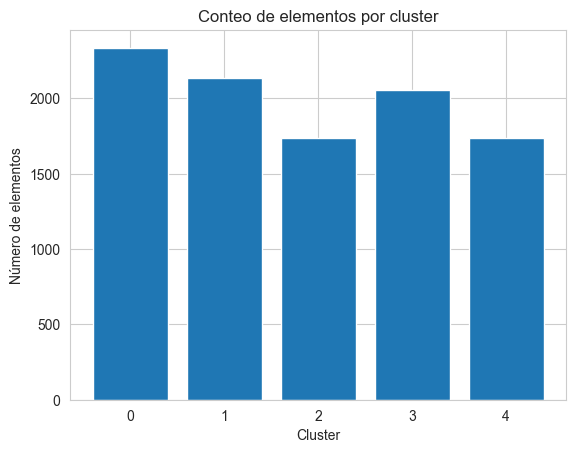

In [103]:
import seaborn as sns
from collections import Counter

# Supongamos que labels es el arreglo con las etiquetas de cluster
labels = kmeans.labels_
label_counts = Counter(labels)

# Gráfico de barras
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Cluster')
plt.ylabel('Número de elementos')
plt.title('Conteo de elementos por cluster')
plt.show()